# 3차 함수를 가지고 Sin 그래프와 
# 유사한 모양의 그래프가 나올 수 있는 계수 찾기.

In [1]:
import math # 수학 패키지
import torch # 파이토치
import matplotlib.pyplot as plt # 시각화

  1. (-3.14... ~ +3.14...) 사이의 값을 1000개의 좌표로 나타내어 Sin 그래프 생성.
  2. 임의의 계수를 가진 3차 함수를 생성.
  3. 두 그래프를 plot 하여 비교

In [2]:
x = torch.linspace(-math.pi, math.pi, 1000) # -pi ~ +pi 값 사이에 점 1000개를 같은 간격으로 생성
y = torch.sin(x) # 1000개의 x 좌표를 가지고 sin 그래프를 만들어줌

# 예측 sin 곡선에 사용할 랜덤한 가중치(계수)를 뽑아 y 만들기
# 삼각함수는 다항 함수로 근사하게 만들 수 있기 때문에 3차 함수를 선택해본다.
# 목표 : 3차 다항식을 sin x 처럼 만들기 위해 최적의 가중치를 알아내려고 학습을 한다.
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
y_random = (a * x**3) + (b * x**2) + (c * x) + d

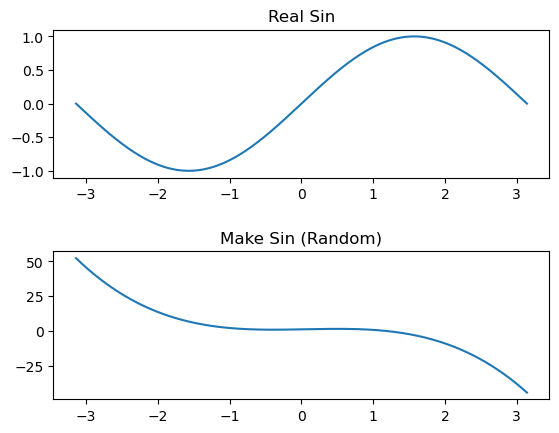

In [3]:
# 실제 sin 그래프를 위에다 plot
plt.subplot (2,1,1)
plt.title ('Real Sin')
plt.plot(x, y)

plt.subplot (2,1,2)
plt.title("Make Sin (Random)")
plt.plot(x, y_random)

plt.subplots_adjust(hspace=0.5)
plt.show()

# 아직은 그냥 랜덤값으로 가중치를 했기때문에
# 실제 sin 그래프와는 다른 모양으로 나온다.

# 학습 진행.
# 손실함수에 대한 계수들의 기울기 변화량을 가지고 손실량이 가장 적을 때의 계수값을 찾는다.

![nn](./손실함수.jpg)

In [4]:
Learning_Rate = 1e-6 # 1/1000000 으로 매우 적은 학습률 설정 (보폭 결정)


# 30000회 학습 진행
for epoch in range(30000):
    y_pred = (a * x**3) + (b * x**2) + (c * x) + d
    
    # 손실함수 정의.
    # (예측값 - 실제값) = 오차
    # 오차의 크기만 궁금하기에 음양 제거, 오차를 더욱 두드러지게 제곱.
    # 전체 성분들의 오차들의 합을 구해서 item화 한다.
    # item화 하는 이유는 메모리 절약등의 이유. python 내부연산에 최적화된 형태로 바꾸는것.
    # 100번째 오차마다 출력해서 오차 동향 확인.
    loss = (y_pred - y).pow(2).sum().item()
    if epoch % 100 == 0:
        print(f"epoch{epoch+1} loss:{loss}")
        
    # 손실함수에 대한 현재 기울기 변화량 grad_y_pred.
    # 손실함수에 대해 각 계수들의 기울기 변화량 grad_a ~ grad_d.
    # 미분의 연쇄 법칙으로 구한 것.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * x**3).sum()
    grad_b = (grad_y_pred * x**2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()
    
    
    # 각 계수의 적절한 값을 찾아가기 위해.
    # 학습률 (손실함수에서의 보폭) * 기울기를 하여 원래 a의 값에서 빼주면서
    # 적절한 값을 찾아간다.
    a -= Learning_Rate * grad_a
    b -= Learning_Rate * grad_b
    c -= Learning_Rate * grad_c
    d -= Learning_Rate * grad_d

epoch1 loss:336367.1875
epoch101 loss:297.43133544921875
epoch201 loss:176.77659606933594
epoch301 loss:105.90901184082031
epoch401 loss:64.23753356933594
epoch501 loss:39.708187103271484
epoch601 loss:25.255338668823242
epoch701 loss:16.73206329345703
epoch801 loss:11.701504707336426
epoch901 loss:8.73017692565918
epoch1001 loss:6.9739484786987305
epoch1101 loss:5.935250282287598
epoch1201 loss:5.320578098297119
epoch1301 loss:4.956640243530273
epoch1401 loss:4.741055011749268
epoch1501 loss:4.613292217254639
epoch1601 loss:4.537547588348389
epoch1701 loss:4.492623805999756
epoch1801 loss:4.465972900390625
epoch1901 loss:4.450156211853027
epoch2001 loss:4.440770149230957
epoch2101 loss:4.4351935386657715
epoch2201 loss:4.431882858276367
epoch2301 loss:4.429914951324463
epoch2401 loss:4.428747177124023
epoch2501 loss:4.428053379058838
epoch2601 loss:4.427640438079834
epoch2701 loss:4.427395343780518
epoch2801 loss:4.42724609375
epoch2901 loss:4.427163124084473
epoch3001 loss:4.42711162

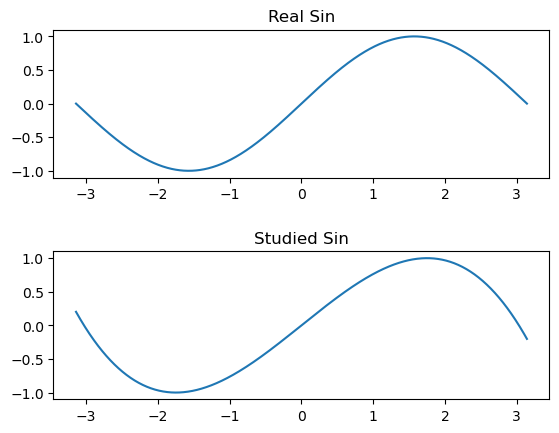

In [5]:
y_studied = (a * x**3) + (b * x**2) + (c * x) + d

plt.subplot (2,1,1)
plt.title ('Real Sin')
plt.plot(x, y)

plt.subplot (2,1,2)
plt.title("Studied Sin")
plt.plot(x, y_studied)

plt.subplots_adjust(hspace=0.5)
plt.show()